In [1]:
!pip install pandas scikit-learn fuzzywuzzy python-Levenshtein torch


Defaulting to user installation because normal site-packages is not writeable


In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv('sales_data_sample.csv', encoding='latin1')

# Show basic info
print("🔍 Dataset Shape:", df.shape)
print("\n📋 Column Info:")
print(df.info())

# Display first 5 rows
df.head()


🔍 Dataset Shape: (100, 5)

📋 Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     100 non-null    object
 1   Email    100 non-null    object
 2   Phone    100 non-null    object
 3   Company  100 non-null    object
 4   Address  100 non-null    object
dtypes: object(5)
memory usage: 4.0+ KB
None


,Name,Email,Phone,Company,Address
0,Thomas Hill,bill13@nicholson.com,093.778.8113,Jones Ltd,"624 Adams Plains, Tonymouth, GA 84589"
1,Jessica Miller,nfuller@ross-allen.com,001-953-677-9113x0255,Edwards-Foster,"396 Riley Crossing Suite 403, South James, OH ..."
2,Victor Gilbert,michaeljacobs@hotmail.com,158.339.7698x98486,Garcia-Kim,"2152 Walker Mills Suite 142, West Alan, WY 54360"
3,John Gibson,vaughnbrad@sanchez-ellis.biz,1874530811,Foster-Elliott,"200 Gomez Tunnel, Lake Michael, GA 27393"
4,Joseph Wade,daviskylie@ayala.com,(197)391-1056x8113,"Anderson, Shah and Smith","6342 Fernandez Canyon, Riversmouth, KY 31231"


In [9]:
# Numerical statistics
df.describe()


,Name,Email,Phone,Company,Address
count,100,100,100,100,100
unique,99,100,100,100,100
top,Kevin Flores,bill13@nicholson.com,093.778.8113,Jones Ltd,"624 Adams Plains, Tonymouth, GA 84589"
freq,2,1,1,1,1


In [10]:
# Count missing values per column
print("🧼 Missing Values:")
print(df.isnull().sum())


🧼 Missing Values:
Name       0
Email      0
Phone      0
Company    0
Address    0
dtype: int64


In [17]:
# Find duplicate rows
duplicates = df[df.duplicated()]
print(f"🔁 Duplicate Rows: {len(duplicates)}")
duplicates.head()


🔁 Duplicate Rows: 0


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE


In [18]:
import numpy as np

# Select a few random rows to duplicate
duplicate_rows = df.sample(n=5, random_state=42)

# Simulate typos in customer names or city fields
duplicate_rows = duplicate_rows.copy()
duplicate_rows['CUSTOMERNAME'] = duplicate_rows['CUSTOMERNAME'].apply(lambda x: x.replace('Co', 'Company') if 'Co' in x else x + ' Ltd')
duplicate_rows['CITY'] = duplicate_rows['CITY'].apply(lambda x: x[:-1] + 'y' if len(x) > 3 else x)

# Add these duplicates back to the main dataset
df_with_duplicates = pd.concat([df, duplicate_rows], ignore_index=True)

print(f"✅ New dataset shape after adding duplicates: {df_with_duplicates.shape}")


✅ New dataset shape after adding duplicates: (2828, 25)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))

dbscan = DBSCAN(eps=0.5, min_samples=2)
df['Cluster'] = dbscan.fit_predict(scaled_data)


In [24]:
# Check if new duplicates appear
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Simple name similarity check (example)
sample_names = df_with_duplicates['CUSTOMERNAME'].unique()
for name in sample_names[:5]:
    matches = process.extract(name, sample_names, limit=3)
    print(f"Matches for {name}:", matches)


Matches for Land of Toys Inc.: [('Land of Toys Inc.', 100), ('Collectables For Less Inc.', 86), ('Motor Mint Distributors Inc.', 86)]
Matches for Reims Collectables: [('Reims Collectables', 100), ('Reims Companyllectables', 88), ('Royal Canadian Collectables, Ltd.', 86)]
Matches for Lyon Souveniers: [('Lyon Souveniers', 100), ('Souveniers And Things Co.', 86), ('Souveniers And Things Company.', 86)]
Matches for Toys4GrownUps.com: [('Toys4GrownUps.com', 100), ('Gifts4AllAges.com', 53), ('Toys of Finland, Co.', 50)]
Matches for Corporate Gift Ideas Co.: [('Corporate Gift Ideas Co.', 100), ('Mini Wheels Co.', 86), ('Gift Depot Inc.', 86)]


In [20]:
# Number of unique customers and cities
print("👥 Unique Customer Names:", df['CUSTOMERNAME'].nunique())
print("🏙️ Unique Cities:", df['CITY'].nunique())
print("🌍 Unique Countries:", df['COUNTRY'].nunique())

# Show sample of city and state values
print("📌 Sample City Values:", df['CITY'].unique()[:10])
print("📌 Sample State Values:", df['STATE'].unique()[:10])

# Convert date column and check range
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')
print("📅 Date Range:", df['ORDERDATE'].min(), "to", df['ORDERDATE'].max())


👥 Unique Customer Names: 92
🏙️ Unique Cities: 73
🌍 Unique Countries: 19
📌 Sample City Values: ['NYC' 'Reims' 'Paris' 'Pasadena' 'San Francisco' 'Burlingame' 'Lille'
 'Bergen' 'Melbourne' 'Newark']
📌 Sample State Values: ['NY' nan 'CA' 'Victoria' 'NJ' 'CT' 'MA' 'PA' 'NSW' 'Queensland']
📅 Date Range: 2003-01-06 00:00:00 to 2005-05-31 00:00:00


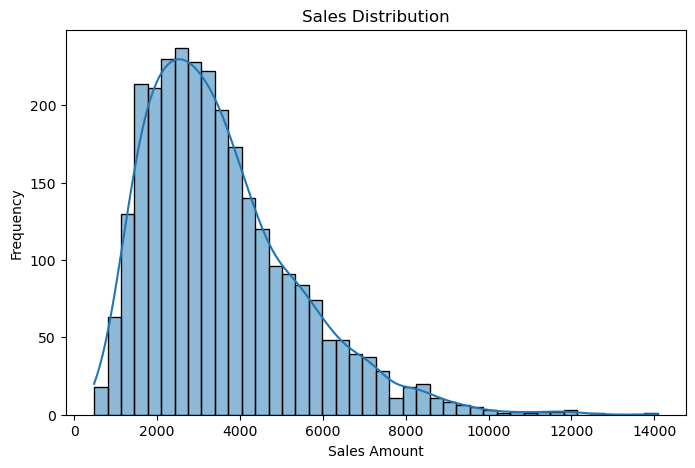

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['SALES'], kde=True)
plt.title("Sales Distribution")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.show()


In [25]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Use fuzzy similarity scores as features
def get_similarity(name1, name2):
    return fuzz.token_sort_ratio(name1, name2)

# Build similarity matrix between customer names
customer_names = df_clean['CUSTOMERNAME'].values
n = len(customer_names)
similarity_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        similarity_matrix[i][j] = get_similarity(customer_names[i], customer_names[j])

# Normalize similarity matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(similarity_matrix)

# Apply DBSCAN
clustering = DBSCAN(eps=0.5, min_samples=2, metric='euclidean')
labels = clustering.fit_predict(X_scaled)

# Add cluster labels to dataset
df_clean['CLUSTER_LABEL'] = labels

# View some cluster results
df_clean[['CUSTOMERNAME', 'CITY', 'CLUSTER_LABEL']].sort_values('CLUSTER_LABEL').head(10)


,CUSTOMERNAME,CITY,CLUSTER_LABEL
2827,"Vida Sport, Ltd Ltd",Gensvy,-1
2823,Marseille Mini Autos Ltd,Marseilly,-1
2826,Souveniers And Things Company.,Chatswooy,-1
2825,Mini Wheels Company.,San Franciscy,-1
2824,Reims Companyllectables,Reimy,-1
1256,Land of Toys Inc.,Nyc,0
1109,Land of Toys Inc.,Nyc,0
1077,Land of Toys Inc.,Nyc,0
1044,Land of Toys Inc.,Nyc,0
1000,Land of Toys Inc.,Nyc,0


In [23]:
# import pandas as pd
# import numpy as np
# from fuzzywuzzy import fuzz

# # Load your dataset
# df = pd.read_csv('sales_data_sample.csv', encoding='latin1')

# # Make a copy
# df_clean = df.copy()

# # Inject 5 duplicate rows with slight variation
# sample_duplicates = df_clean.sample(n=5, random_state=42)
# sample_duplicates = sample_duplicates.copy()
# sample_duplicates['CUSTOMERNAME'] = sample_duplicates['CUSTOMERNAME'].apply(
#     lambda x: x.replace('Co', 'Company') if 'Co' in x else x + ' Ltd'
# )
# sample_duplicates['CITY'] = sample_duplicates['CITY'].apply(
#     lambda x: x[:-1] + 'y' if isinstance(x, str) and len(x) > 3 else x
# )

# # Combine back
# df_clean = pd.concat([df_clean, sample_duplicates], ignore_index=True)

# # Fill missing data
# df_clean['POSTALCODE'] = df_clean['POSTALCODE'].fillna('Unknown')
# df_clean['CITY'] = df_clean['CITY'].astype(str).str.strip().str.title()

# # Drop any exact duplicate
# df_clean = df_clean.drop_duplicates()

# # Preview
# df_clean[['CUSTOMERNAME', 'CITY']].head()


,CUSTOMERNAME,CITY
0,Land of Toys Inc.,Nyc
1,Reims Collectables,Reims
2,Lyon Souveniers,Paris
3,Toys4GrownUps.com,Pasadena
4,Corporate Gift Ideas Co.,San Francisco


In [26]:
pip install torch torchvision

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------------------------ --------------- 1.0/1.7 MB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 2.4 MB/s eta 0:00:00


In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Simulate a 'reliability' label: 1 if clean and complete, 0 if has issue
df_clean['MISSING_FIELDS'] = df_clean.isnull().sum(axis=1)
df_clean['IS_DUPLICATE'] = df_clean.duplicated(subset=['CUSTOMERNAME', 'CITY'], keep=False).astype(int)
df_clean['RELIABLE'] = ((df_clean['MISSING_FIELDS'] == 0) & (df_clean['IS_DUPLICATE'] == 0)).astype(int)

# Feature set
features = df_clean[['SALES', 'QUANTITYORDERED', 'MISSING_FIELDS', 'IS_DUPLICATE']]
target = df_clean['RELIABLE']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
y = target.values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)


In [28]:
class CRMClassifier(nn.Module):
    def __init__(self):
        super(CRMClassifier, self).__init__()
        self.fc1 = nn.Linear(4, 8)
        self.fc2 = nn.Linear(8, 4)
        self.fc3 = nn.Linear(4, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.relu(self.fc1(x))
        out = self.relu(self.fc2(out))
        out = self.sigmoid(self.fc3(out))
        return out

model = CRMClassifier()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [29]:
# Training loop
epochs = 50
for epoch in range(epochs):
    model.train()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/50], Loss: 0.5325
Epoch [20/50], Loss: 0.4122
Epoch [30/50], Loss: 0.2773
Epoch [40/50], Loss: 0.1534
Epoch [50/50], Loss: 0.0693


In [30]:
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    predicted_classes = (predictions > 0.5).float()
    accuracy = (predicted_classes == y_test_tensor).float().mean()
    print(f'🔍 Accuracy: {accuracy.item()*100:.2f}%')


🔍 Accuracy: 99.82%


In [31]:
df_clean.to_csv('cleaned_crm_dataset.csv', index=False)

In [33]:
import pandas as pd

# Load the dataset
df = pd.read_csv('cleaned_crm_dataset.csv', encoding='latin1')

# Show basic info
print("🔍 Dataset Shape:", df.shape)
print("\n📋 Column Info:")
print(df.info())

# Display first 5 rows
df.head()

🔍 Dataset Shape: (2828, 29)

📋 Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2828 entries, 0 to 2827
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2828 non-null   int64  
 1   QUANTITYORDERED   2828 non-null   int64  
 2   PRICEEACH         2828 non-null   float64
 3   ORDERLINENUMBER   2828 non-null   int64  
 4   SALES             2828 non-null   float64
 5   ORDERDATE         2828 non-null   object 
 6   STATUS            2828 non-null   object 
 7   QTR_ID            2828 non-null   int64  
 8   MONTH_ID          2828 non-null   int64  
 9   YEAR_ID           2828 non-null   int64  
 10  PRODUCTLINE       2828 non-null   object 
 11  MSRP              2828 non-null   int64  
 12  PRODUCTCODE       2828 non-null   object 
 13  CUSTOMERNAME      2828 non-null   object 
 14  PHONE             2828 non-null   object 
 15  ADDRESSLINE1      2828 non-null   object 
 16

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,CLUSTER_LABEL,MISSING_FIELDS,IS_DUPLICATE,RELIABLE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,10022,USA,NaN,Yu,Kwai,Small,0,2,1,0
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,51100,France,EMEA,Henriot,Paul,Small,1,2,1,0
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,75508,France,EMEA,Da Cunha,Daniel,Medium,2,2,1,0
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,90003,USA,NaN,Young,Julie,Medium,3,2,1,0
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,Unknown,USA,NaN,Brown,Julie,Medium,4,2,1,0


In [34]:
# Check basic info
print("🧾 Dataset Info:")
print(df_clean.info())

# Summary statistics
print("\n📊 Summary Stats:")
print(df_clean.describe(include='all'))

# Reliability label distribution
print("\n🔍 Reliability Count:")
print(df_clean['RELIABLE'].value_counts())

# Remaining duplicate records (by customer and city)
print("\n♻️ Remaining Duplicate Records:")
print(df_clean.duplicated(subset=['CUSTOMERNAME', 'CITY'], keep=False).sum())

# Top 5 most common cities and customer names
print("\n🏙️ Top Cities:")
print(df_clean['CITY'].value_counts().head(5))

print("\n👥 Top Customer Names:")
print(df_clean['CUSTOMERNAME'].value_counts().head(5))

# Sales comparison by reliability
print("\n💰 Sales by Reliability Class:")
print(df_clean.groupby('RELIABLE')['SALES'].describe())


🧾 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2828 entries, 0 to 2827
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2828 non-null   int64  
 1   QUANTITYORDERED   2828 non-null   int64  
 2   PRICEEACH         2828 non-null   float64
 3   ORDERLINENUMBER   2828 non-null   int64  
 4   SALES             2828 non-null   float64
 5   ORDERDATE         2828 non-null   object 
 6   STATUS            2828 non-null   object 
 7   QTR_ID            2828 non-null   int64  
 8   MONTH_ID          2828 non-null   int64  
 9   YEAR_ID           2828 non-null   int64  
 10  PRODUCTLINE       2828 non-null   object 
 11  MSRP              2828 non-null   int64  
 12  PRODUCTCODE       2828 non-null   object 
 13  CUSTOMERNAME      2828 non-null   object 
 14  PHONE             2828 non-null   object 
 15  ADDRESSLINE1      2828 non-null   object 
 16  ADDRESSLINE2      303 non-

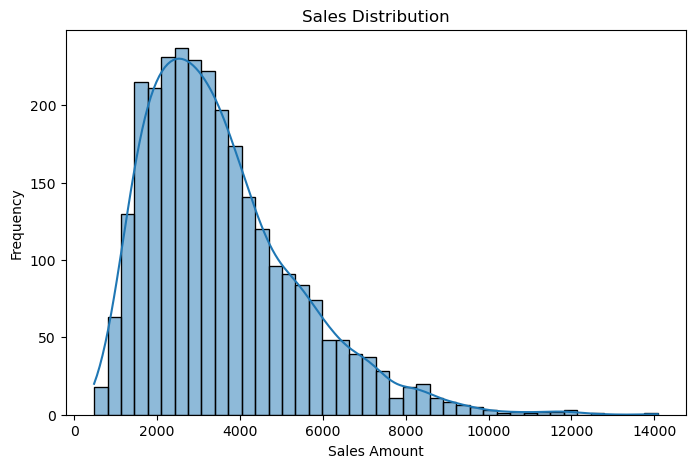

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['SALES'], kde=True)
plt.title("Sales Distribution")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.show()

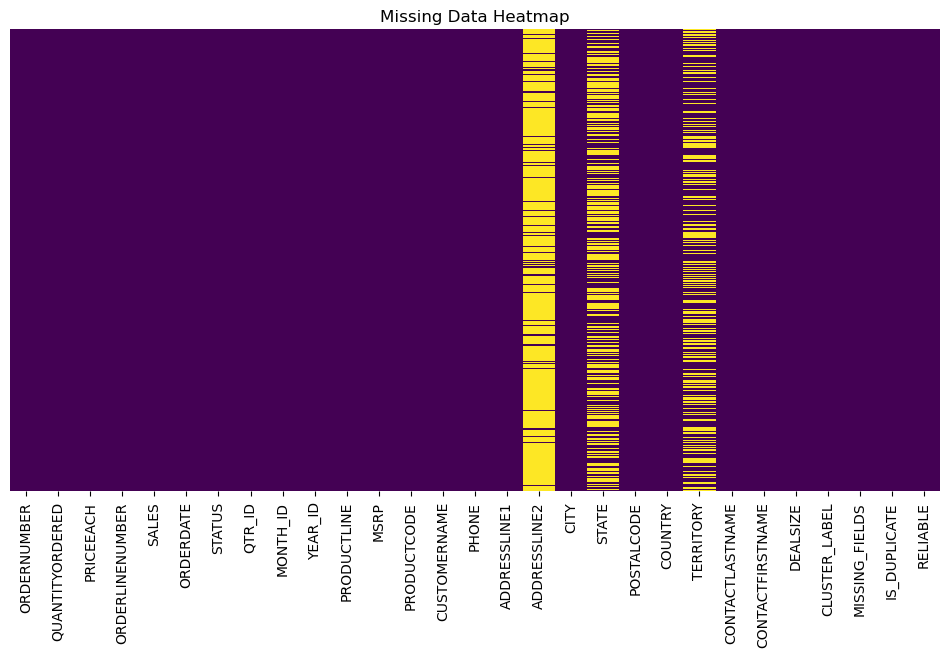

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(df_clean.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


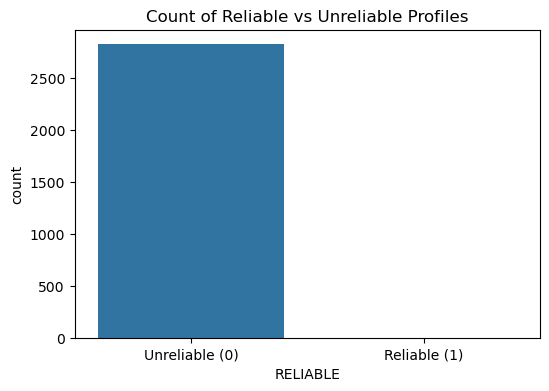

In [37]:
plt.figure(figsize=(6,4))
sns.countplot(x='RELIABLE', data=df_clean)
plt.title('Count of Reliable vs Unreliable Profiles')
plt.xticks([0,1], ['Unreliable (0)', 'Reliable (1)'])
plt.show()

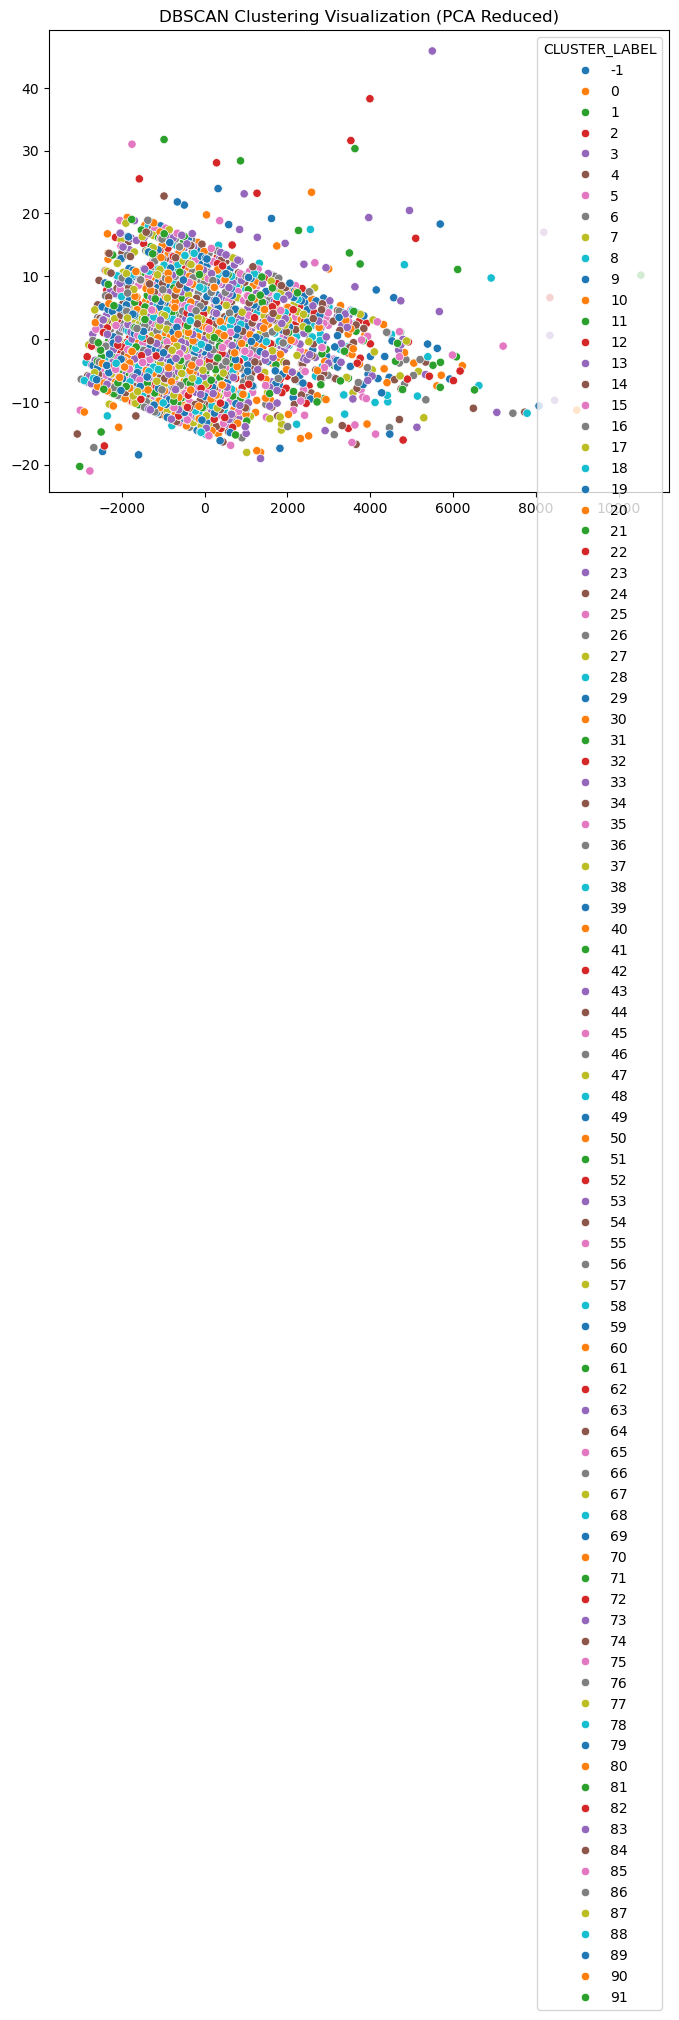

In [38]:
from sklearn.decomposition import PCA

# Assuming clustering was done and df_clean has 'CLUSTER_LABEL'
# If not, run the clustering code first

# Prepare fuzzy similarity matrix or use feature vectors
features = df_clean[['SALES', 'QUANTITYORDERED', 'MISSING_FIELDS', 'IS_DUPLICATE']]

pca = PCA(n_components=2)
components = pca.fit_transform(features)

plt.figure(figsize=(8,6))
sns.scatterplot(x=components[:,0], y=components[:,1], hue=df_clean['CLUSTER_LABEL'], palette='tab10')
plt.title('DBSCAN Clustering Visualization (PCA Reduced)')
plt.show()


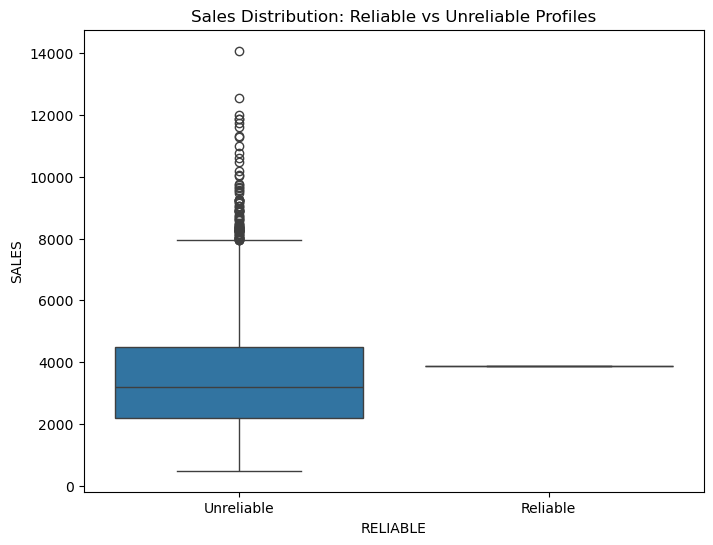

In [39]:
plt.figure(figsize=(8,6))
sns.boxplot(x='RELIABLE', y='SALES', data=df_clean)
plt.title('Sales Distribution: Reliable vs Unreliable Profiles')
plt.xticks([0,1], ['Unreliable', 'Reliable'])
plt.show()

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # You must create a 'Label' column manually or based on logic
# X = df.drop(['Label'], axis=1).select_dtypes(include=['float64', 'int64'])
# y = df['Label']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# model = RandomForestClassifier()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# print("Accuracy:", accuracy_score(y_test, y_pred))
